<a href="https://colab.research.google.com/github/Saket03-P/Ethereum-Transactions-Fraud-Detection/blob/main/Models/MP_RFC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import pickle
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [ ]:
ds=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/increased_transaction_dataset.csv')
x=ds.copy()  
x.drop(['FLAG','Unnamed: 0'],axis=1,inplace=True)
y=ds['FLAG']
y=y.replace('Fraud',1)
y=y.replace('Non - Fraud',0)
counts=y.value_counts()
balancing_factor={0:1,1:3}
x.head(5)

,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,max value received,avg val received,avg val sent,total Ether sent,total ether balance,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0.00,34682.01,173410.03,0,5,1,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e-12,0.0,0.0,0.0,1.0,-1,-1
1,202252.36,13562.51,485879.80,2,6,0,5.882285,2.358151,7.073171,14.146342,0.002562,1.092703e+03,0.0,0.0,0.0,10.0,185,257
2,20807.97,23567.05,355000.13,8,8,0,15.252378,5.730538,5.730074,45.840593,0.003714,0.000000e+00,0.0,0.0,0.0,0.0,4,3
3,80.96,155838.28,468324.43,10,3,0,2.148150,0.762823,0.450816,4.508160,-2.219690,0.000000e+00,0.0,0.0,0.0,0.0,4,3
4,0.00,1060.76,7936.62,1,7,0,1.493095,0.802857,5.619140,5.619140,0.000861,1.337000e+01,0.0,0.0,0.0,1.0,1,74


random forest without cost sensitive

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)
from sklearn.ensemble import RandomForestClassifier
# Create a Random Forest classifier object
rfc = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
# Train the Random Forest classifier
rfc.fit(x_train, y_train)

predictions = rfc.predict(x_test)
print(classification_report(y_test,predictions))
print('accuracy=',accuracy_score(y_test,predictions))
print('recall=',recall_score(y_test,predictions))
print(precision_score(y_test,predictions))


# Assuming that `clf` is your trained model
with open('model2.pkl', 'wb') as file:
    pickle.dump(rfc, file)
from google.colab import files

# Assuming that `model.pkl` is your saved model file
#files.download('model2.pkl')


              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4559
           1       0.99      0.94      0.96      1346

    accuracy                           0.98      5905
   macro avg       0.99      0.97      0.98      5905
weighted avg       0.98      0.98      0.98      5905

accuracy= 0.9837425910245554
recall= 0.9383358098068351
0.9898119122257053


Text(0.5, 1.0, 'Random Forest Classifier on Ethereum Fraud CTGAN dataset without Cost Sensitive Learning')

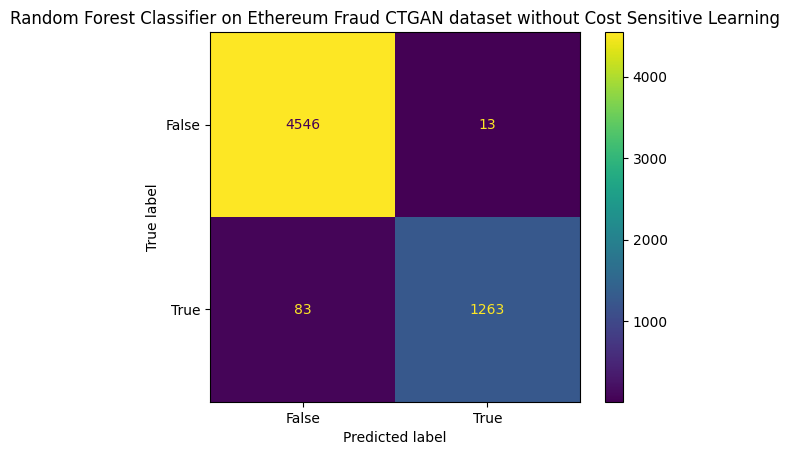

In [ ]:
cm=confusion_matrix(y_test,predictions)
cm_display =ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()
plt.title('Random Forest Classifier on Ethereum Fraud CTGAN dataset without Cost Sensitive Learning')

random forest with cost sensitive learning

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Create a Random Forest classifier object
rfc = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42,class_weight='balanced')
# Train the Random Forest classifier
rfc.fit(x_train, y_train)

predictions = rfc.predict(x_test)
print(classification_report(y_test,predictions))
print('accuracy=',accuracy_score(y_test,predictions))
print('recall=',recall_score(y_test,predictions))
print(precision_score(y_test,predictions))


# Assuming that `clf` is your trained model
with open('model2.pkl', 'wb') as file:
    pickle.dump(rfc, file)
from google.colab import files

# Assuming that `model.pkl` is your saved model file
#files.download('model2.pkl')


              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4559
           1       0.99      0.95      0.97      1346

    accuracy                           0.99      5905
   macro avg       0.99      0.97      0.98      5905
weighted avg       0.99      0.99      0.99      5905

accuracy= 0.9854360711261643
recall= 0.9494799405646359
0.9861111111111112


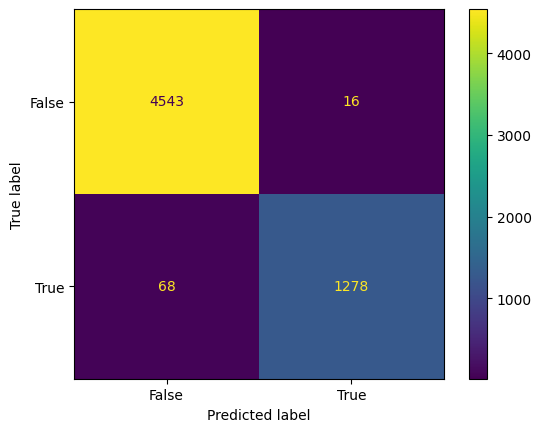

In [ ]:
cm=confusion_matrix(y_test,predictions)
cm_display =ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()
#plt.show()

random forest with cost sensitive learning =3

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Create a Random Forest classifier object
balanced={0:1,1:3}
rfc = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42,class_weight=balanced)
# Train the Random Forest classifier
rfc.fit(x_train, y_train)

predictions = rfc.predict(x_test)
print(classification_report(y_test,predictions))
print('accuracy=',accuracy_score(y_test,predictions))
print('recall=',recall_score(y_test,predictions))
print(precision_score(y_test,predictions))


# Assuming that `clf` is your trained model
with open('model2.pkl', 'wb') as file:
    pickle.dump(rfc, file)
from google.colab import files

# Assuming that `model.pkl` is your saved model file
#files.download('model2.pkl')


              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4559
           1       0.99      0.95      0.97      1346

    accuracy                           0.99      5905
   macro avg       0.99      0.97      0.98      5905
weighted avg       0.99      0.99      0.99      5905

accuracy= 0.985774767146486
recall= 0.9494799405646359
0.9876352395672334


Text(0.5, 1.0, 'Random Forest Classifier on Ethereum Fraud CTGAN dataset with Cost Sensitive Learning = 3')

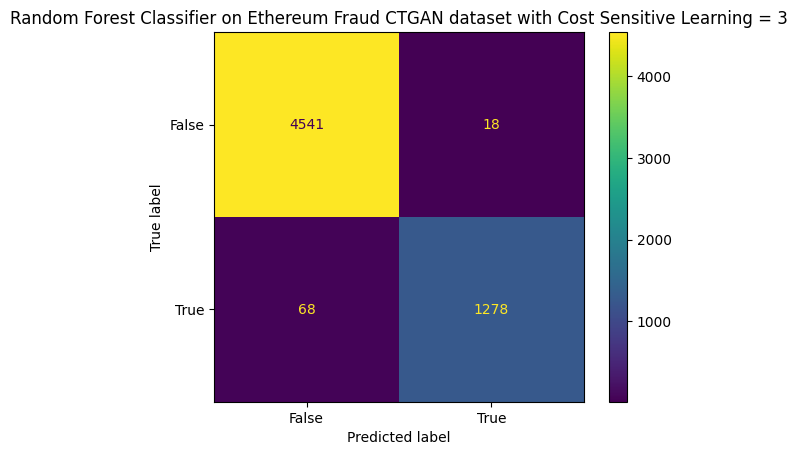

In [ ]:
cm=confusion_matrix(y_test,predictions)
cm_display =ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()
plt.title('Random Forest Classifier on Ethereum Fraud CTGAN dataset with Cost Sensitive Learning = 3')